In [1]:
import pandas as pd
import numpy as np

from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix

# Models
from sklearn.linear_model import LinearRegression, Ridge
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Feature Selection
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Importance
from sklearn.inspection import permutation_importance

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.ticker as mtick

# Hyperparameter Tuning
import optuna

# Hiding warnings 
import warnings
warnings.filterwarnings("ignore")
import kaggle



c:\Users\lauro.telles\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:

kaggle.api.authenticate()

dataset = 'competitions/walmart-recruiting-store-sales-forecasting/'
download_path = '.'


kaggle.api.dataset_download_files(dataset, path=download_path, unzip=True)

Dataset URL: https://www.kaggle.com/datasets/competitions/walmart-recruiting-store-sales-forecasting/versions/


ApiException: (403)
Reason: Forbidden
HTTP response headers: HTTPHeaderDict({'Content-Type': 'application/json', 'Date': 'Thu, 23 May 2024 18:44:32 GMT', 'Access-Control-Allow-Credentials': 'true', 'Access-Control-Allow-Origin': '*', 'Set-Cookie': 'ka_sessionid=194295386ca78eb398ed240bb1121f23; max-age=2626560; path=/, GCLB=CIei0YO7uMPhrQEQAw; path=/; HttpOnly', 'Transfer-Encoding': 'chunked', 'Vary': 'Accept-Encoding', 'X-Kaggle-MillisecondsElapsed': '15', 'X-Kaggle-RequestId': '740b8a15bf2e579b535fc484200a4945', 'X-Kaggle-ApiVersion': '1.6.14', 'X-Kaggle-HubVersion': '0.2.5', 'X-Frame-Options': 'SAMEORIGIN', 'Strict-Transport-Security': 'max-age=63072000; includeSubDomains; preload', 'Content-Security-Policy': "object-src 'none'; script-src 'nonce-iEWt3qM7TGV3hGerba4paQ==' 'report-sample' 'unsafe-inline' 'unsafe-eval' 'strict-dynamic' https: http:; base-uri 'none'; report-uri https://csp.withgoogle.com/csp/kaggle/20201130; frame-src 'self' https://www.kaggleusercontent.com https://www.youtube.com/embed/ https://polygraph-cool.github.io https://www.google.com/recaptcha/ https://www.docdroid.com https://www.docdroid.net https://kaggle-static.storage.googleapis.com https://kkb-production.jupyter-proxy.kaggle.net https://kkb-production.firebaseapp.com https://kaggle-metastore.firebaseapp.com https://apis.google.com https://content-sheets.googleapis.com/ https://accounts.google.com/ https://storage.googleapis.com https://docs.google.com https://drive.google.com https://calendar.google.com/;", 'X-Content-Type-Options': 'nosniff', 'Referrer-Policy': 'strict-origin-when-cross-origin', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'})
HTTP response body: b'{"code":403,"message":"Permission \\u0027datasets.get\\u0027 was denied"}'


In [12]:
train_file = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Wallmart store sales\train.csv')
comp_teste_file = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Wallmart store sales\test.csv')
stores_file = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Wallmart store sales\stores.csv')
features_file = pd.read_csv(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Wallmart store sales\features.csv')

train_file


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [3]:
test_file = train_file.merge(features_file,on=['Date','Store'],how='left')
test_file

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,False
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,False
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,False
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,False


In [72]:
print(test_file.shape)
print(test_file.info())
print(test_file.isna().sum())

(421570, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday_x   421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  IsHoliday_y   421570 non-null  bool   
dtypes: bool(2), float64(10), int64(2), object(1)
memory usage: 42.6+ MB
None
Store                0
Dept                 0
Date

In [4]:
test_file['MarkDown1'].fillna(test_file['MarkDown1'].mean())

test_file = test_file.drop(columns=['Unemployment','CPI','MarkDown1','MarkDown3','MarkDown5','MarkDown4','MarkDown2','IsHoliday_y'])

test_file

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price
0,1,1,2010-02-05,24924.50,False,42.31,2.572
1,1,1,2010-02-12,46039.49,True,38.51,2.548
2,1,1,2010-02-19,41595.55,False,39.93,2.514
3,1,1,2010-02-26,19403.54,False,46.63,2.561
4,1,1,2010-03-05,21827.90,False,46.50,2.625
...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997
421566,45,98,2012-10-05,628.10,False,64.89,3.985
421567,45,98,2012-10-12,1061.02,False,54.47,4.000
421568,45,98,2012-10-19,760.01,False,56.47,3.969


Feature Engeneering

In [5]:
test_file2 = test_file.copy()
test_file2['Date'] = pd.to_datetime(test_file2['Date'])


test_file2['IsHoliday_x'] = np.where(test_file2['IsHoliday_x']==False,0,1)
test_file2['Year'] = test_file2['Date'].dt.year
test_file2['Weekday'] = test_file2['Date'].dt.weekday
test_file2['Month'] = test_file2['Date'].dt.month
test_file2['leap_year'] = test_file2['Date'].dt.is_leap_year
test_file2['Year_Start_End']= test_file2['Date'].dt.is_year_start

test_file2['leap_year'] = np.where(test_file2['leap_year']==False,0,1)
test_file2['Year_Start_End'] = np.where(test_file2['Year_Start_End']==False,0,1)

test_file2['Month sin'] =  test_file2['Month'].apply(lambda x: np.sin(x *(2 *np.pi/12)))
test_file2['Month con'] =  test_file2['Month'].apply(lambda x: np.cos(x *(2 *np.pi/12)))


test_file2.head().T

,0,1,2,3,4
Store,1,1,1,1,1
Dept,1,1,1,1,1
Date,2010-02-05 00:00:00,2010-02-12 00:00:00,2010-02-19 00:00:00,2010-02-26 00:00:00,2010-03-05 00:00:00
Weekly_Sales,24924.5,46039.49,41595.55,19403.54,21827.9
IsHoliday_x,0,1,0,0,0
Temperature,42.31,38.51,39.93,46.63,46.5
Fuel_Price,2.572,2.548,2.514,2.561,2.625
Year,2010,2010,2010,2010,2010
Weekday,4,4,4,4,4
Month,2,2,2,2,3


Exploratory analisis


In [6]:
test_file3 = test_file2.copy()

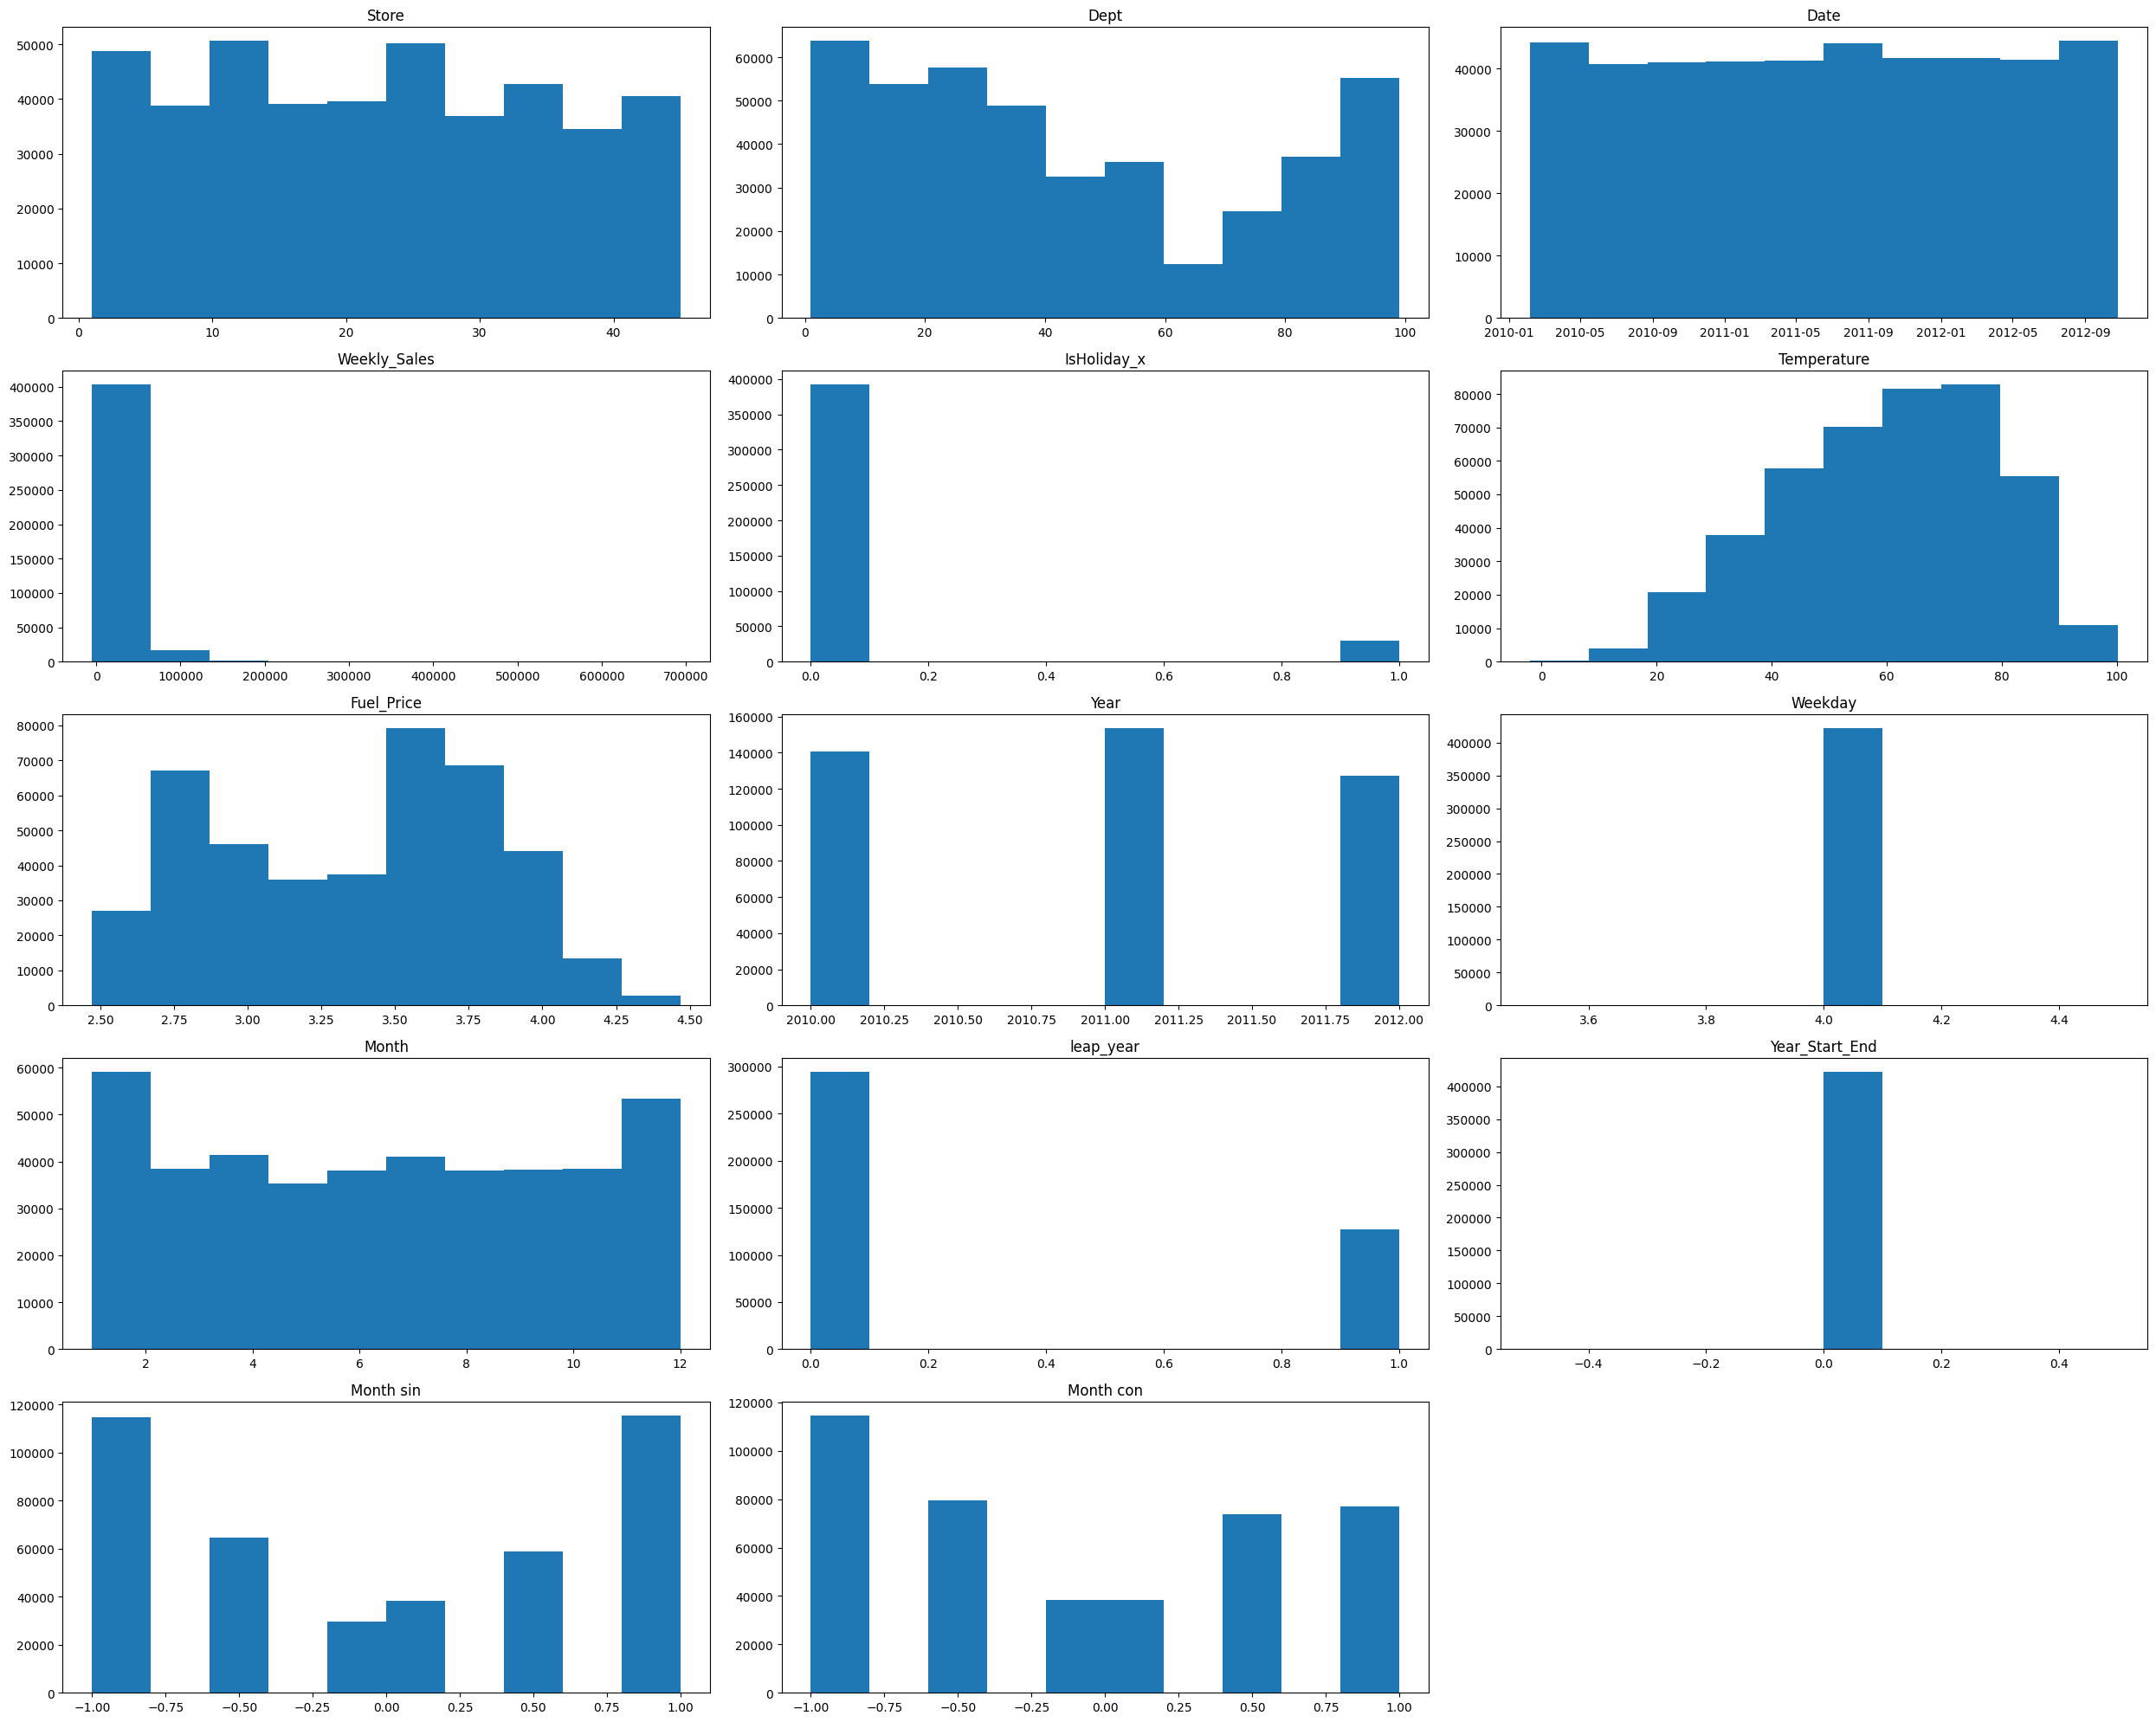

In [77]:
num_cols = len(test_file3.columns)

fig, axes = plt.subplots(5,3, figsize=(25, 20))

axes = axes.flatten()
for i, col in enumerate(test_file3.columns):
    axes[i].hist(test_file3[col])
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

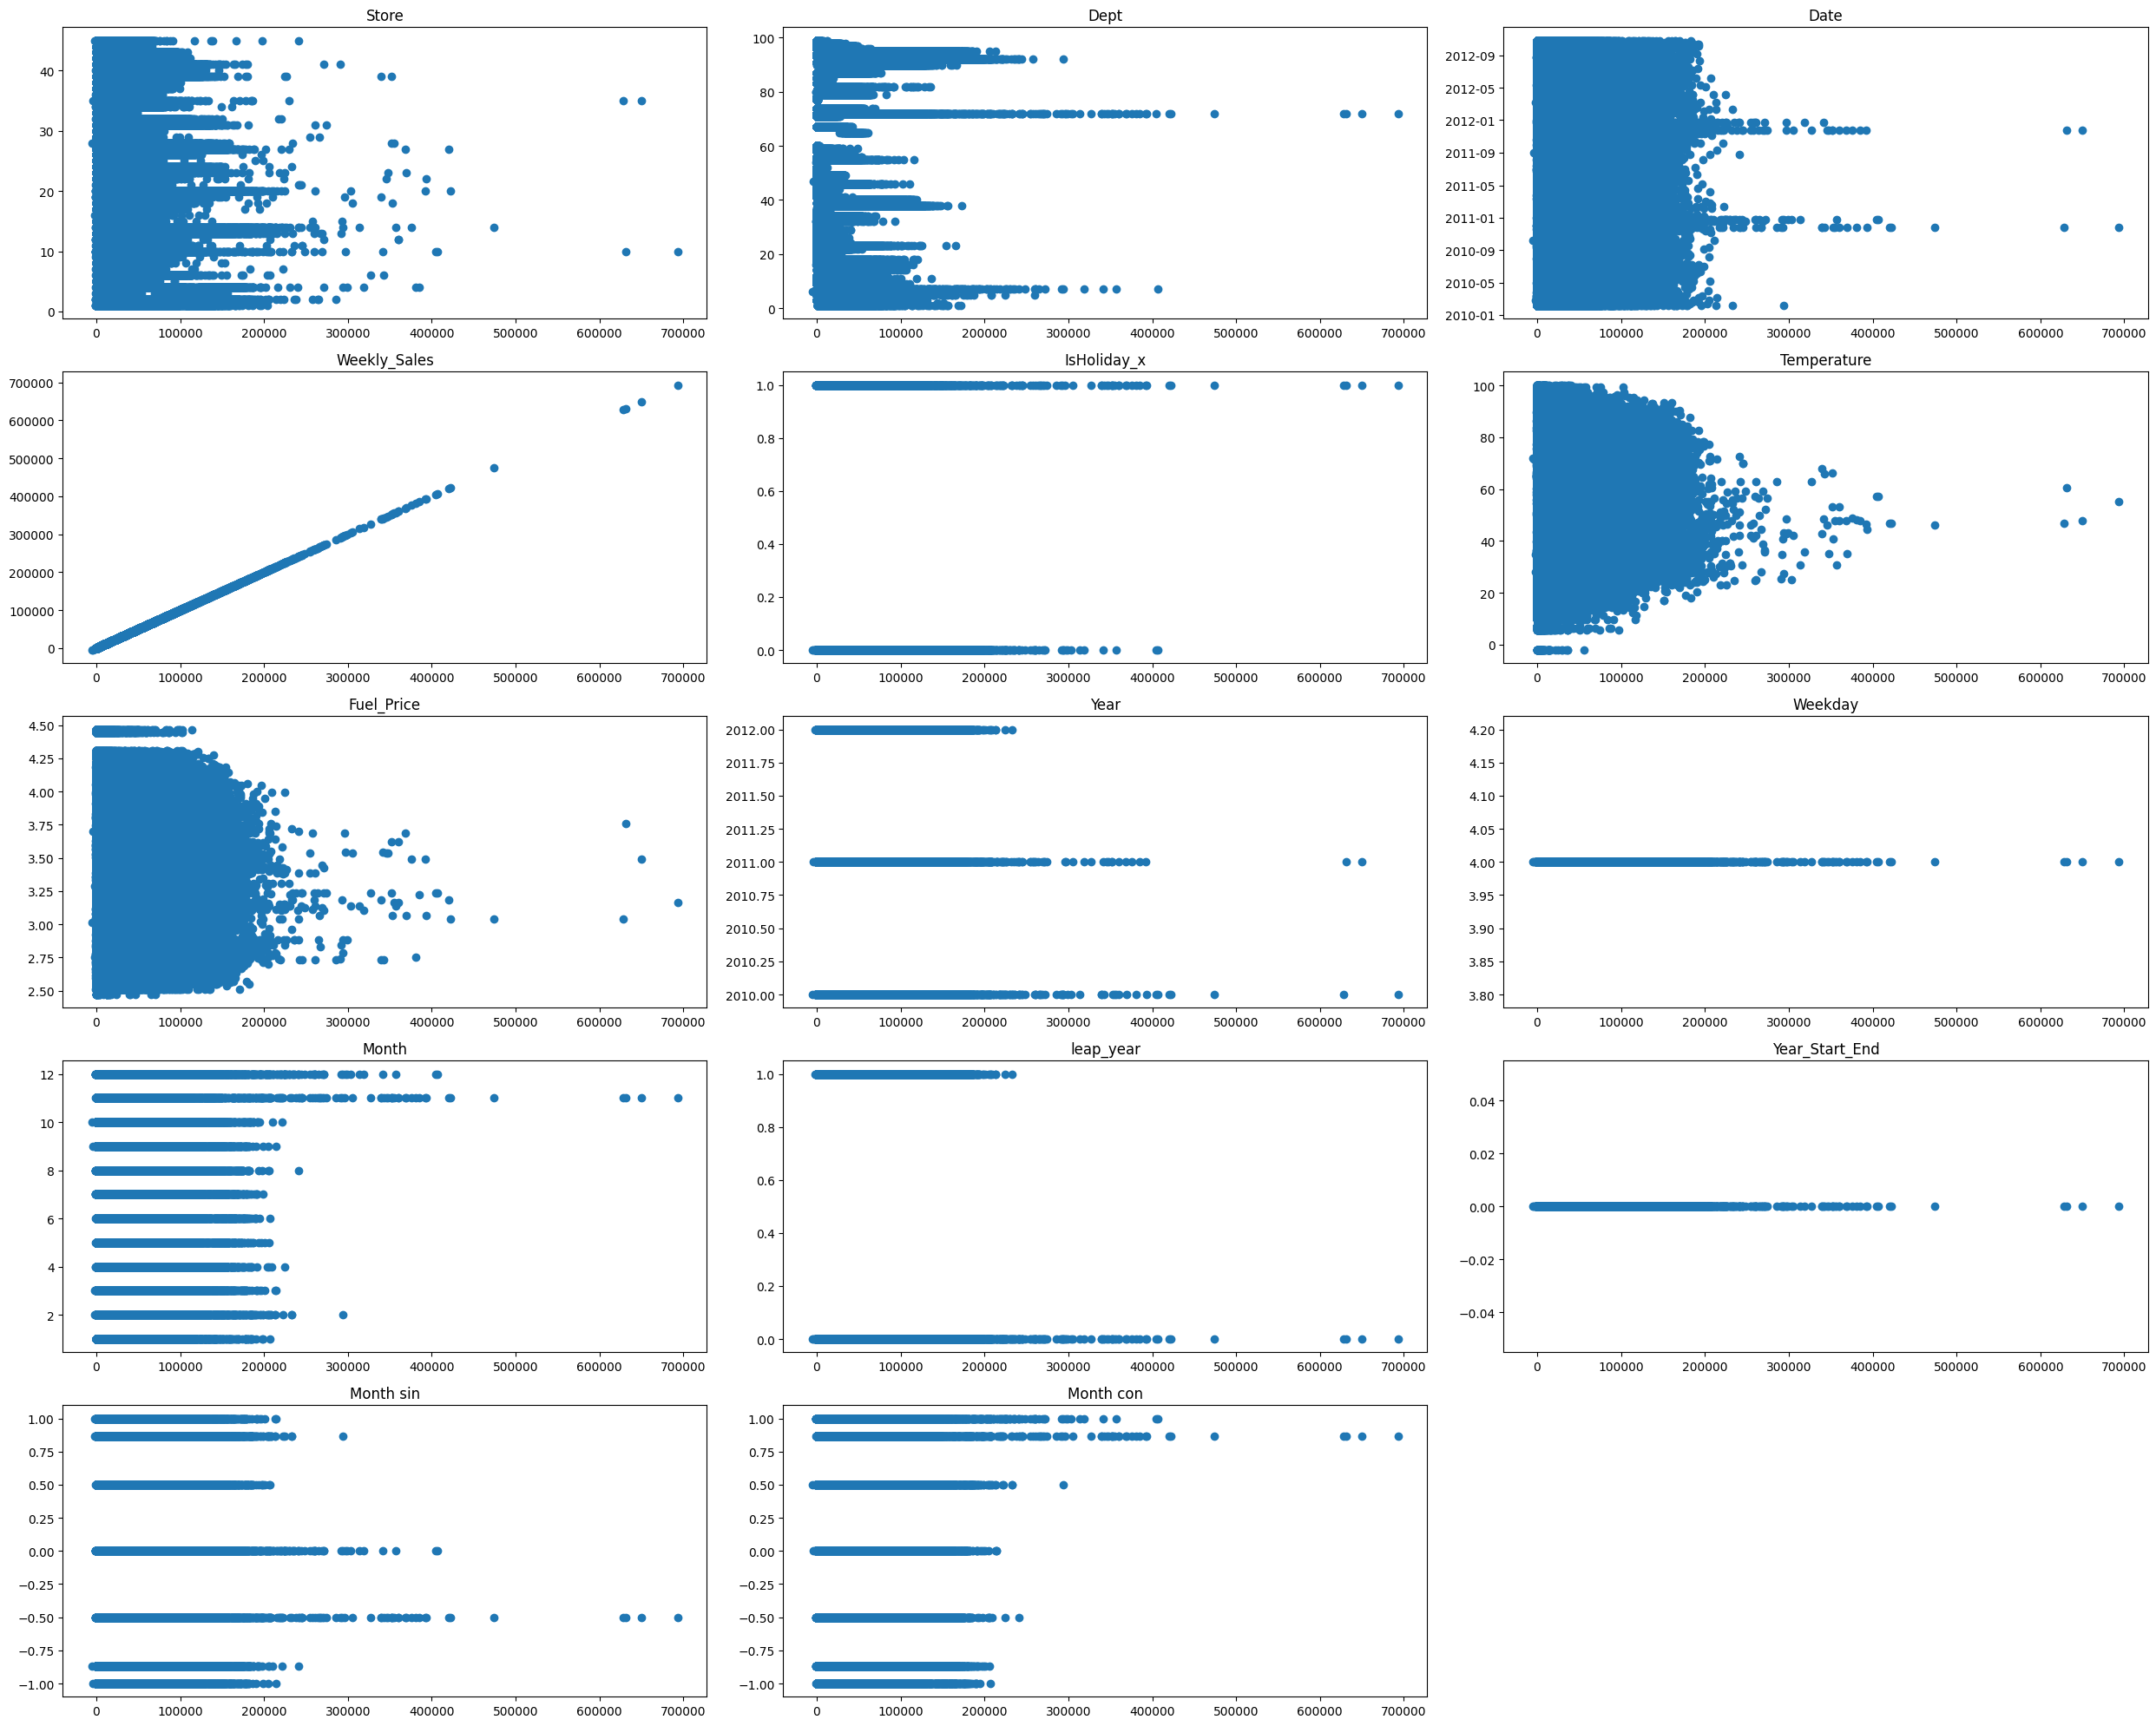

In [78]:
num_cols = test_file3.columns[:11]


fig, axes = plt.subplots(5, 3, figsize=(25, 20))


axes = axes.flatten()


for i, col in enumerate(test_file3.columns):
    axes[i].scatter(test_file3['Weekly_Sales'], test_file3[col])
    axes[i].set_title(col)


for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.tight_layout()
plt.show()

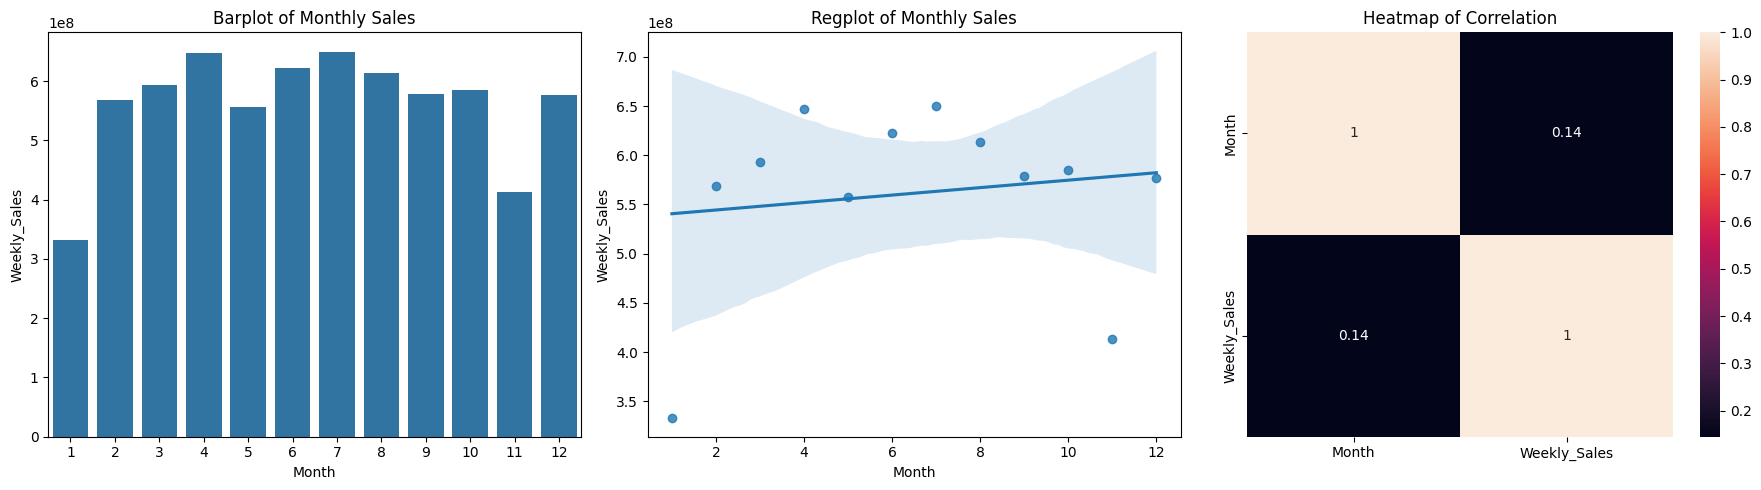

In [96]:
aux = test_file3[['Month','Weekly_Sales']].groupby('Month').sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Month', y='Weekly_Sales', data=aux, ax=axes[0])
axes[0].set_title('Barplot of Monthly Sales')


sns.regplot(x='Month', y='Weekly_Sales', data=aux, ax=axes[1])
axes[1].set_title('Regplot of Monthly Sales')


sns.heatmap(aux.corr(method='pearson'), annot=True, ax=axes[2])
axes[2].set_title('Heatmap of Correlation')

plt.tight_layout()

plt.show()

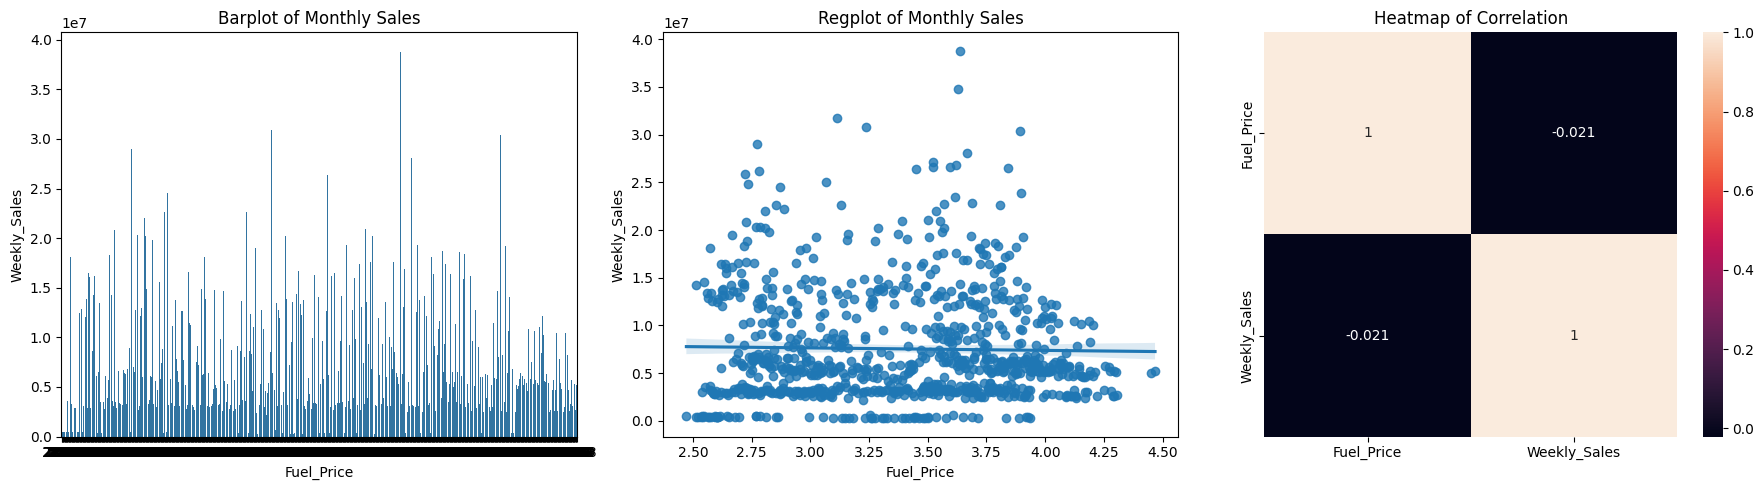

In [97]:
aux = test_file3[['Fuel_Price','Weekly_Sales']].groupby('Fuel_Price').sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='Fuel_Price', y='Weekly_Sales', data=aux, ax=axes[0])
axes[0].set_title('Barplot of Fuel')


sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=aux, ax=axes[1])
axes[1].set_title('Regplot of Fuel')


sns.heatmap(aux.corr(method='pearson'), annot=True, ax=axes[2])
axes[2].set_title('Heatmap of Correlation')

plt.tight_layout()

plt.show()

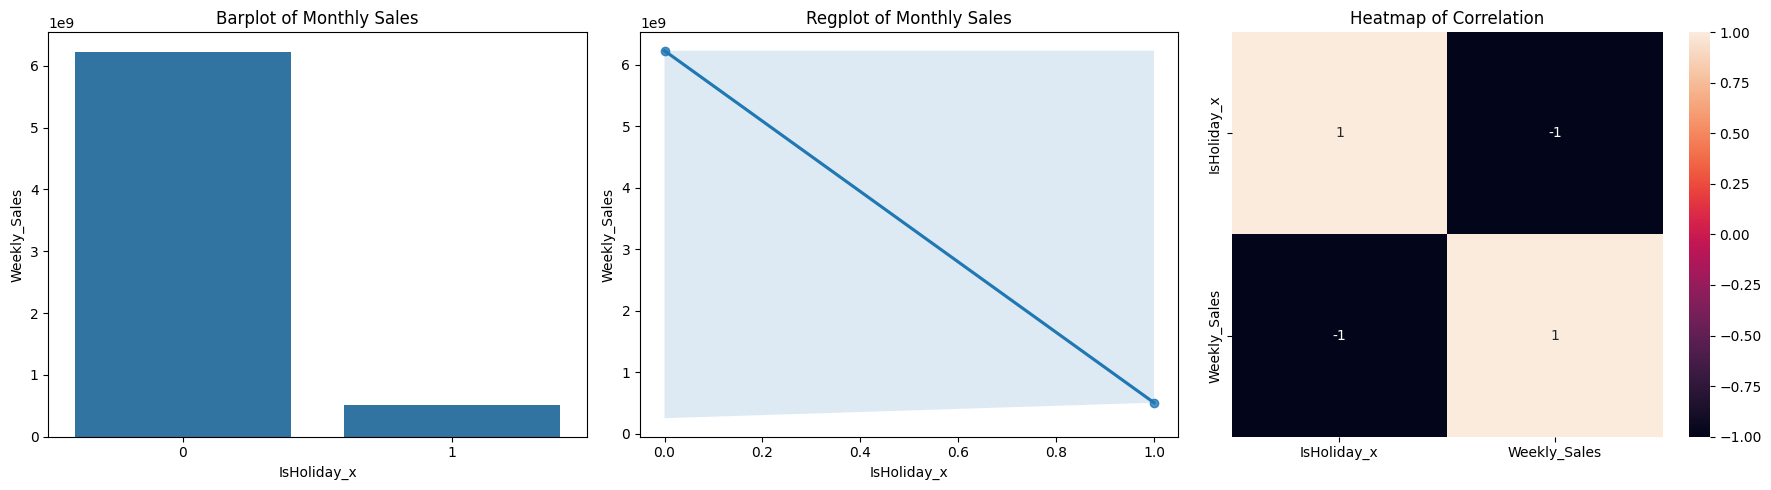

In [100]:
aux = test_file3[['IsHoliday_x','Weekly_Sales']].groupby('IsHoliday_x').sum().reset_index()

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.barplot(x='IsHoliday_x', y='Weekly_Sales', data=aux, ax=axes[0])
axes[0].set_title('Barplot of Holidays')


sns.regplot(x='IsHoliday_x', y='Weekly_Sales', data=aux, ax=axes[1])
axes[1].set_title('Regplot of Holidays')


sns.heatmap(aux.corr(method='pearson'), annot=True, ax=axes[2])
axes[2].set_title('Heatmap of Correlation')

plt.tight_layout()

plt.show()

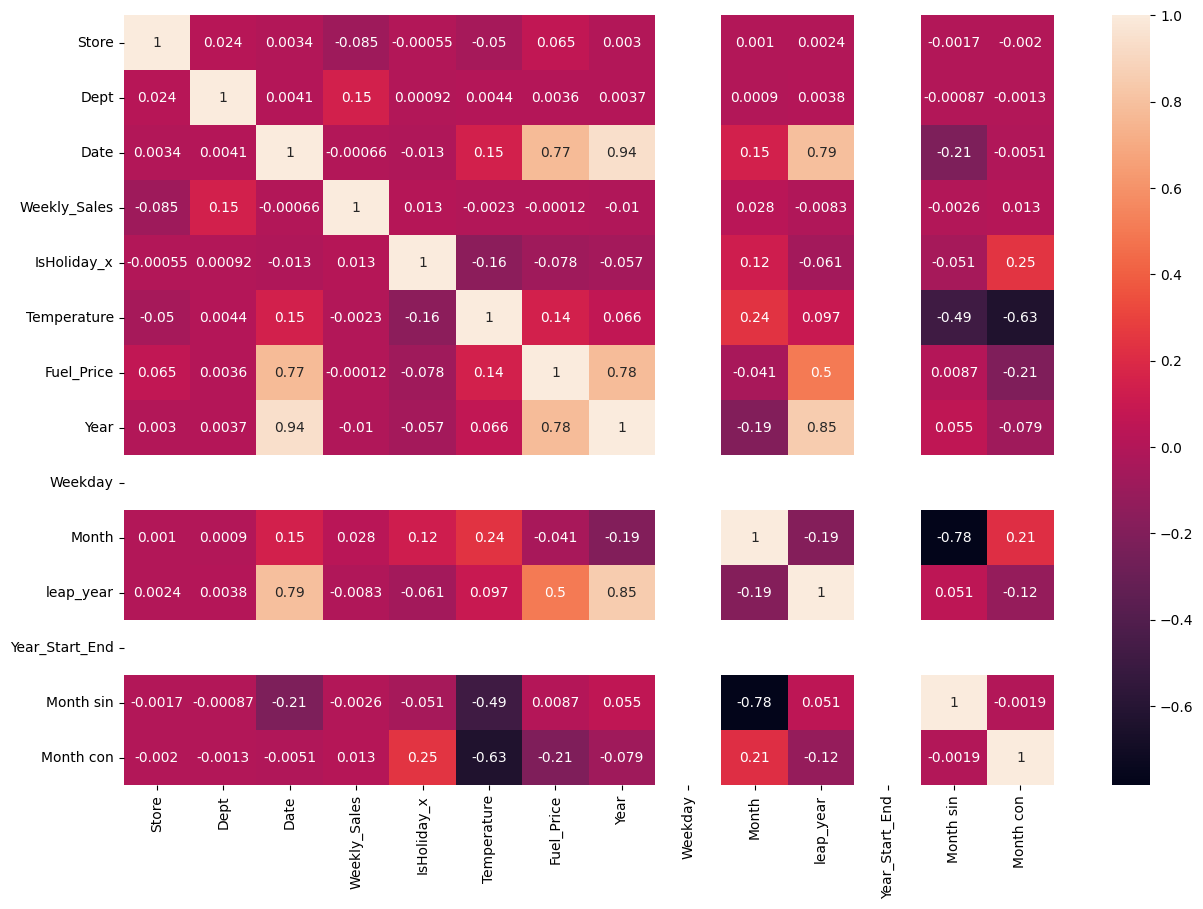

In [103]:
plt.figure(figsize=(15, 10))

plt.subplot(1, 1, 1)
sns.heatmap(test_file3.corr(method='pearson'), annot=True)

plt.show()

Data preparation

In [116]:
from sklearn.model_selection import train_test_split
test_file4 = test_file3.copy()


datas = test_file4['Date']

X = test_file4.drop(columns=['Weekly_Sales','Date'])
Y = test_file['Weekly_Sales']


X_train, X_test, y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

regressors = [
    LinearRegression(),
    Ridge(random_state = 42),
    ExtraTreesRegressor(random_state = 42),
    GradientBoostingRegressor(random_state = 42),
    KNeighborsRegressor(),
    XGBRegressor(random_state = 42),
    LGBMRegressor(random_state = 42),
    CatBoostRegressor(random_state = 42, verbose = False),
    AdaBoostRegressor(random_state = 42),
    RandomForestRegressor(random_state = 42)
]

for reg in regressors:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    rmse = mean_squared_error(y_test, y_pred, squared = False)
    print(f'{type(reg).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')




LinearRegression: R² = 0.03, Root Mean Squared Error = 22237.51
Ridge: R² = 0.03, Root Mean Squared Error = 22237.51
ExtraTreesRegressor: R² = 0.96, Root Mean Squared Error = 4667.17
GradientBoostingRegressor: R² = 0.62, Root Mean Squared Error = 13866.11
KNeighborsRegressor: R² = 0.59, Root Mean Squared Error = 14459.21
XGBRegressor: R² = 0.92, Root Mean Squared Error = 6418.35
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011877 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 337256, number of used features: 10
[LightGBM] [Info] Start training from score 15995.674800
LGBMRegressor: R² = 0.86, Root Mean Squared Error = 8310.31
CatBoostRegressor: R² = 0.90, Root Mean Squared Error = 7121.08
AdaB

In [10]:
from sklearn.model_selection import train_test_split

test_file4 = test_file3.copy()

datas = test_file4['Date']

X = test_file4.drop(columns=['Weekly_Sales','Date'])
Y = test_file['Weekly_Sales']
model = RandomForestRegressor(n_estimators=50,max_depth=10)

X_train, X_test, y_train,y_test = train_test_split(X,Y,train_size=0.8,random_state=100)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
print(f'{type(model).__name__}: R² = {r2:.2f}, Root Mean Squared Error = {rmse:.2f}')





RandomForestRegressor: R² = 0.79, Root Mean Squared Error = 10409.71


In [11]:
import joblib

joblib.dump(model, 'random_forest_model.pkl')




['random_forest_model.pkl']

Creating Class

In [37]:
class Wallmart_st_sales():
    def __init__(self):
        print('hello world')

    def juntando_dados(self,caminho_arquivo):
        test_file = pd.read_csv(caminho_arquivo)
        test_file = train_file.merge(features_file,on=['Date','Store'],how='left')
        test_file['MarkDown1'].fillna(test_file['MarkDown1'].mean())
        test_file = test_file.drop(columns=['Unemployment','CPI','MarkDown1','MarkDown3','MarkDown5','MarkDown4','MarkDown2','IsHoliday_y'])
        return test_file

    def feature_engeneering(self,test_file2):
        test_file2 = test_file.copy()
        test_file2['Date'] = pd.to_datetime(test_file2['Date'])


        test_file2['IsHoliday_x'] = np.where(test_file2['IsHoliday_x']==False,0,1)
        test_file2['Year'] = test_file2['Date'].dt.year
        test_file2['Weekday'] = test_file2['Date'].dt.weekday
        test_file2['Month'] = test_file2['Date'].dt.month
        test_file2['leap_year'] = test_file2['Date'].dt.is_leap_year
        test_file2['Year_Start_End']= test_file2['Date'].dt.is_year_start

        test_file2['leap_year'] = np.where(test_file2['leap_year']==False,0,1)
        test_file2['Year_Start_End'] = np.where(test_file2['Year_Start_End']==False,0,1)

        test_file2['Month sin'] =  test_file2['Month'].apply(lambda x: np.sin(x *(2 *np.pi/12)))
        test_file2['Month con'] =  test_file2['Month'].apply(lambda x: np.cos(x *(2 *np.pi/12)))

        return test_file2
    
    def final_preparation(self,test_file4):
        test_file4 = test_file3.copy()

        datas = test_file4['Date']

        X = test_file4.drop(columns=['Date','Weekly_Sales'])
        return X



        


if __name__=="__main__":

    wp = Wallmart_st_sales()
    pipeline = wp.juntando_dados(r'C:\Users\lauro.telles\Desktop\Web Scrapping\codigo py\Wallmart store sales\test.csv')
    pipeline_2 = wp.feature_engeneering(pipeline)
    pipeline_3 = wp.final_preparation(pipeline_2)


hello world


In [47]:
model = joblib.load('random_forest_model.pkl')

prediction = model.predict(pipeline_3)

pipeline_2['Weekly_Sales'] = prediction
pipeline_2



,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,Year,Weekday,Month,leap_year,Year_Start_End,Month sin,Month con
0,1,1,2010-02-05,27642.996627,0,42.31,2.572,2010,4,2,0,0,0.866025,5.000000e-01
1,1,1,2010-02-12,36740.206222,1,38.51,2.548,2010,4,2,0,0,0.866025,5.000000e-01
2,1,1,2010-02-19,28126.103537,0,39.93,2.514,2010,4,2,0,0,0.866025,5.000000e-01
3,1,1,2010-02-26,26851.495510,0,46.63,2.561,2010,4,2,0,0,0.866025,5.000000e-01
4,1,1,2010-03-05,24206.663003,0,46.50,2.625,2010,4,3,0,0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,672.311246,0,64.88,3.997,2012,4,9,1,0,-1.000000,-1.836970e-16
421566,45,98,2012-10-05,747.018871,0,64.89,3.985,2012,4,10,1,0,-0.866025,5.000000e-01
421567,45,98,2012-10-12,762.668944,0,54.47,4.000,2012,4,10,1,0,-0.866025,5.000000e-01
421568,45,98,2012-10-19,765.560876,0,56.47,3.969,2012,4,10,1,0,-0.866025,5.000000e-01
